In [1]:
# 1.) Write a small function call extract_header

In [207]:
import re
import pandas as pd
import matplotlib.pyplot as plt

In [221]:
def extract_header(filename,comment_prefix,header_row_index,header_row_delimiter ):
    """ a small function that extract the header"""
    # First exercise Read text file
    file = open("Land_and_Ocean_summary.txt","r")
    list_of_lines = file.readlines()
    file.close()
    comment=[]
    for line in list_of_lines:
        line = line.strip("\n")
        if comment_prefix in line:
            line = line.strip(comment_prefix+" ")
            line = line.split(header_row_delimiter+" ")
            comment.append(line)
    return comment[header_row_index]

In [222]:
header = extract_header('Land_and_Ocean_summary.txt', comment_prefix='%', header_row_index=-1, header_row_delimiter=',')

In [223]:
header

['Year',
 'Annual Anomaly',
 'Annual Unc.',
 'Five-year Anomaly',
 'Five-year Unc.',
 'Annual Anomaly',
 'Annual Unc.',
 'Five-year Anomaly',
 'Five-year Unc.']

In [224]:
# 2.) The function should return a dataframe, where the first column (i.e. the year) is the index

In [252]:
def read_anomaly_data_into_dataframe (filename, header, max_cols, comment_prefix):
    """ Read anomaly data into dataframe using pandas read table.
    """
    x = pd.read_table(filename, comment = comment_prefix, names=header[:max_cols],index_col=0,delimiter="\s+",usecols=range(0,max_cols))   
    return x

In [253]:
anomaly_df = read_anomaly_data_into_dataframe('Land_and_Ocean_summary.txt', header, max_cols=5, comment_prefix='%')

In [254]:
anomaly_df 

,Annual Anomaly,Annual Unc.,Five-year Anomaly,Five-year Unc.
Year,,,,
1850,-0.532,0.154,NaN,NaN
1851,-0.405,0.169,NaN,NaN
1852,-0.395,0.165,-0.423,0.121
1853,-0.418,0.158,-0.384,0.109
1854,-0.363,0.142,-0.400,0.090
...,...,...,...,...
2014,0.675,0.045,0.728,0.040
2015,0.814,0.043,0.777,0.041
2016,0.949,0.044,0.808,0.040


In [255]:
# 3.) pandas functionality to do some calculations.

In [289]:
def anomaly_avg_per_decade(anomaly_df):
    """ 
    functionality to do some calculations. 
    """
    anomaly_df['New'] = anomaly_df.index
    anomaly_df['New']= anomaly_df['New'].astype(str)
#    anomaly_df['Sub'] = anomaly_df.New.str.slice(0,3) + "0"
#    a = anomaly_df.groupby('Sub')['Annual Anomaly'].mean()
    a_group = anomaly_df.groupby(anomaly_df.index//10*10).mean()
    annu = a_group.loc[:,'Annual Anomaly']
    return annu

In [290]:
anomalies_per_decade = anomaly_avg_per_decade(anomaly_df)

In [291]:
anomalies_per_decade

Year
1850   -0.441500
1860   -0.406900
1870   -0.297600
1880   -0.403400
1890   -0.391000
1900   -0.395700
1910   -0.402900
1920   -0.250800
1930   -0.128200
1940    0.013200
1950   -0.015800
1960   -0.015100
1970   -0.007300
1980    0.169800
1990    0.338600
2000    0.551000
2010    0.723222
Name: Annual Anomaly, dtype: float64

In [292]:
#4. Create a new cell where you plot

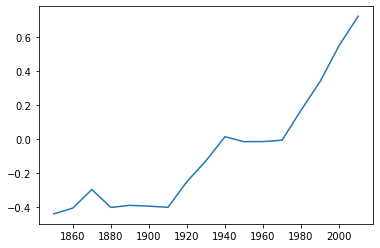

In [293]:
plt.plot(anomalies_per_decade)